# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and explore dataset

In [3]:
# Load the dataset
file_path = './datasets/plant_moniter_health_data.csv'
df = pd.read_csv(file_path)

In [4]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe().T)

Shape of the dataset: (1000, 9)


,Plant_ID,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status
0,Plant_1,26.490142,73.993554,34.872326,5.546096,41.365064,18728.720954,68.859186,0
1,Plant_2,24.585207,69.246337,42.832220,6.069807,49.687965,18639.757675,73.690692,1
2,Plant_3,26.943066,60.596304,33.113701,6.293197,50.180169,14613.070482,70.579398,1
3,Plant_4,29.569090,53.530632,40.380577,7.443844,54.726303,19009.729425,74.520042,1
4,Plant_5,24.297540,66.982233,16.595780,6.778277,36.331416,22198.487245,77.858497,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Plant_ID             1000 non-null   object 
 1   Temperature_C        1000 non-null   float64
 2   Humidity_%           1000 non-null   float64
 3   Soil_Moisture_%      1000 non-null   float64
 4   Soil_pH              1000 non-null   float64
 5   Nutrient_Level       1000 non-null   float64
 6   Light_Intensity_lux  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
 8   Health_Status        1000 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 70.4+ KB
None

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Temperature_C,1000.0,25.057996,2.937648,15.276198,23.057229,25.075902,26.943832,36.558194
Humidity_%,1000.0,60.708362,9.974544,30.596114,53.937583,60.630771,67.288822,91.931076
Soil_Moisture_%,1000.0,45.087513,14.751814,-0.292682,35.280006,44.996239,54.913730,103.893566
Soil_pH,1000.0,6.490640,0.513566,5.035276,6.131290,6.500092,6.833473,8.121546
Nutrient_Level,1000.0,49.507264,9.923802,18.232962,43.173950,49.817580,56.391231,81.129102
Light_Intensity_lux,1000.0,19859.787199,3022.167739,11301.458360,17918.921580,19871.518786,21837.340538,29294.898302
Health_Score,1000.0,79.718435,10.250045,52.873874,72.448627,79.452536,86.997451,115.290552
Health_Status,1000.0,0.826000,0.379299,0.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


# Unique Value Exploration

In [6]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
Plant_ID               1000
Temperature_C          1000
Humidity_%             1000
Soil_Moisture_%        1000
Soil_pH                1000
Nutrient_Level         1000
Light_Intensity_lux    1000
Health_Score           1000
Health_Status             2
dtype: int64


In [7]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['Temperature_C', 'Humidity_%', 'Soil_Moisture_%', 'Soil_pH', 'Nutrient_Level', 'Light_Intensity_lux', 'Health_Score', 'Health_Status']
Categorical Columns: ['Plant_ID']


# Exploratory Data Analysis (EDA)

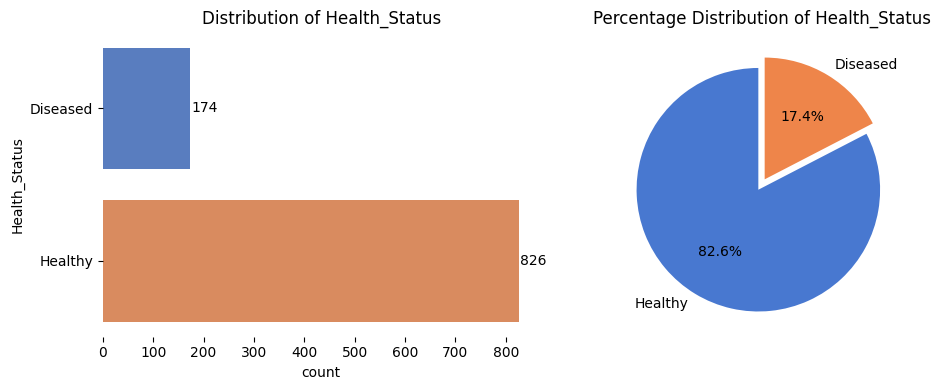

In [8]:
column_name = 'Health_Status'
temp_df = df
temp_df['Health_Status'] = df['Health_Status'].map({1: 'Healthy', 0: 'Diseased'})
plt.figure(figsize=(10, 4))

# First subplot: Count plot
plt.subplot(1, 2, 1)
sns.countplot(y=column_name, data=temp_df, palette='muted', hue=column_name, legend=False)  
plt.title(f'Distribution of {column_name}')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Second subplot: Pie chart
plt.subplot(1, 2, 2)
df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*temp_df[column_name].nunique())
plt.title(f'Percentage Distribution of {column_name}')
plt.ylabel('')  

plt.tight_layout()
plt.show()

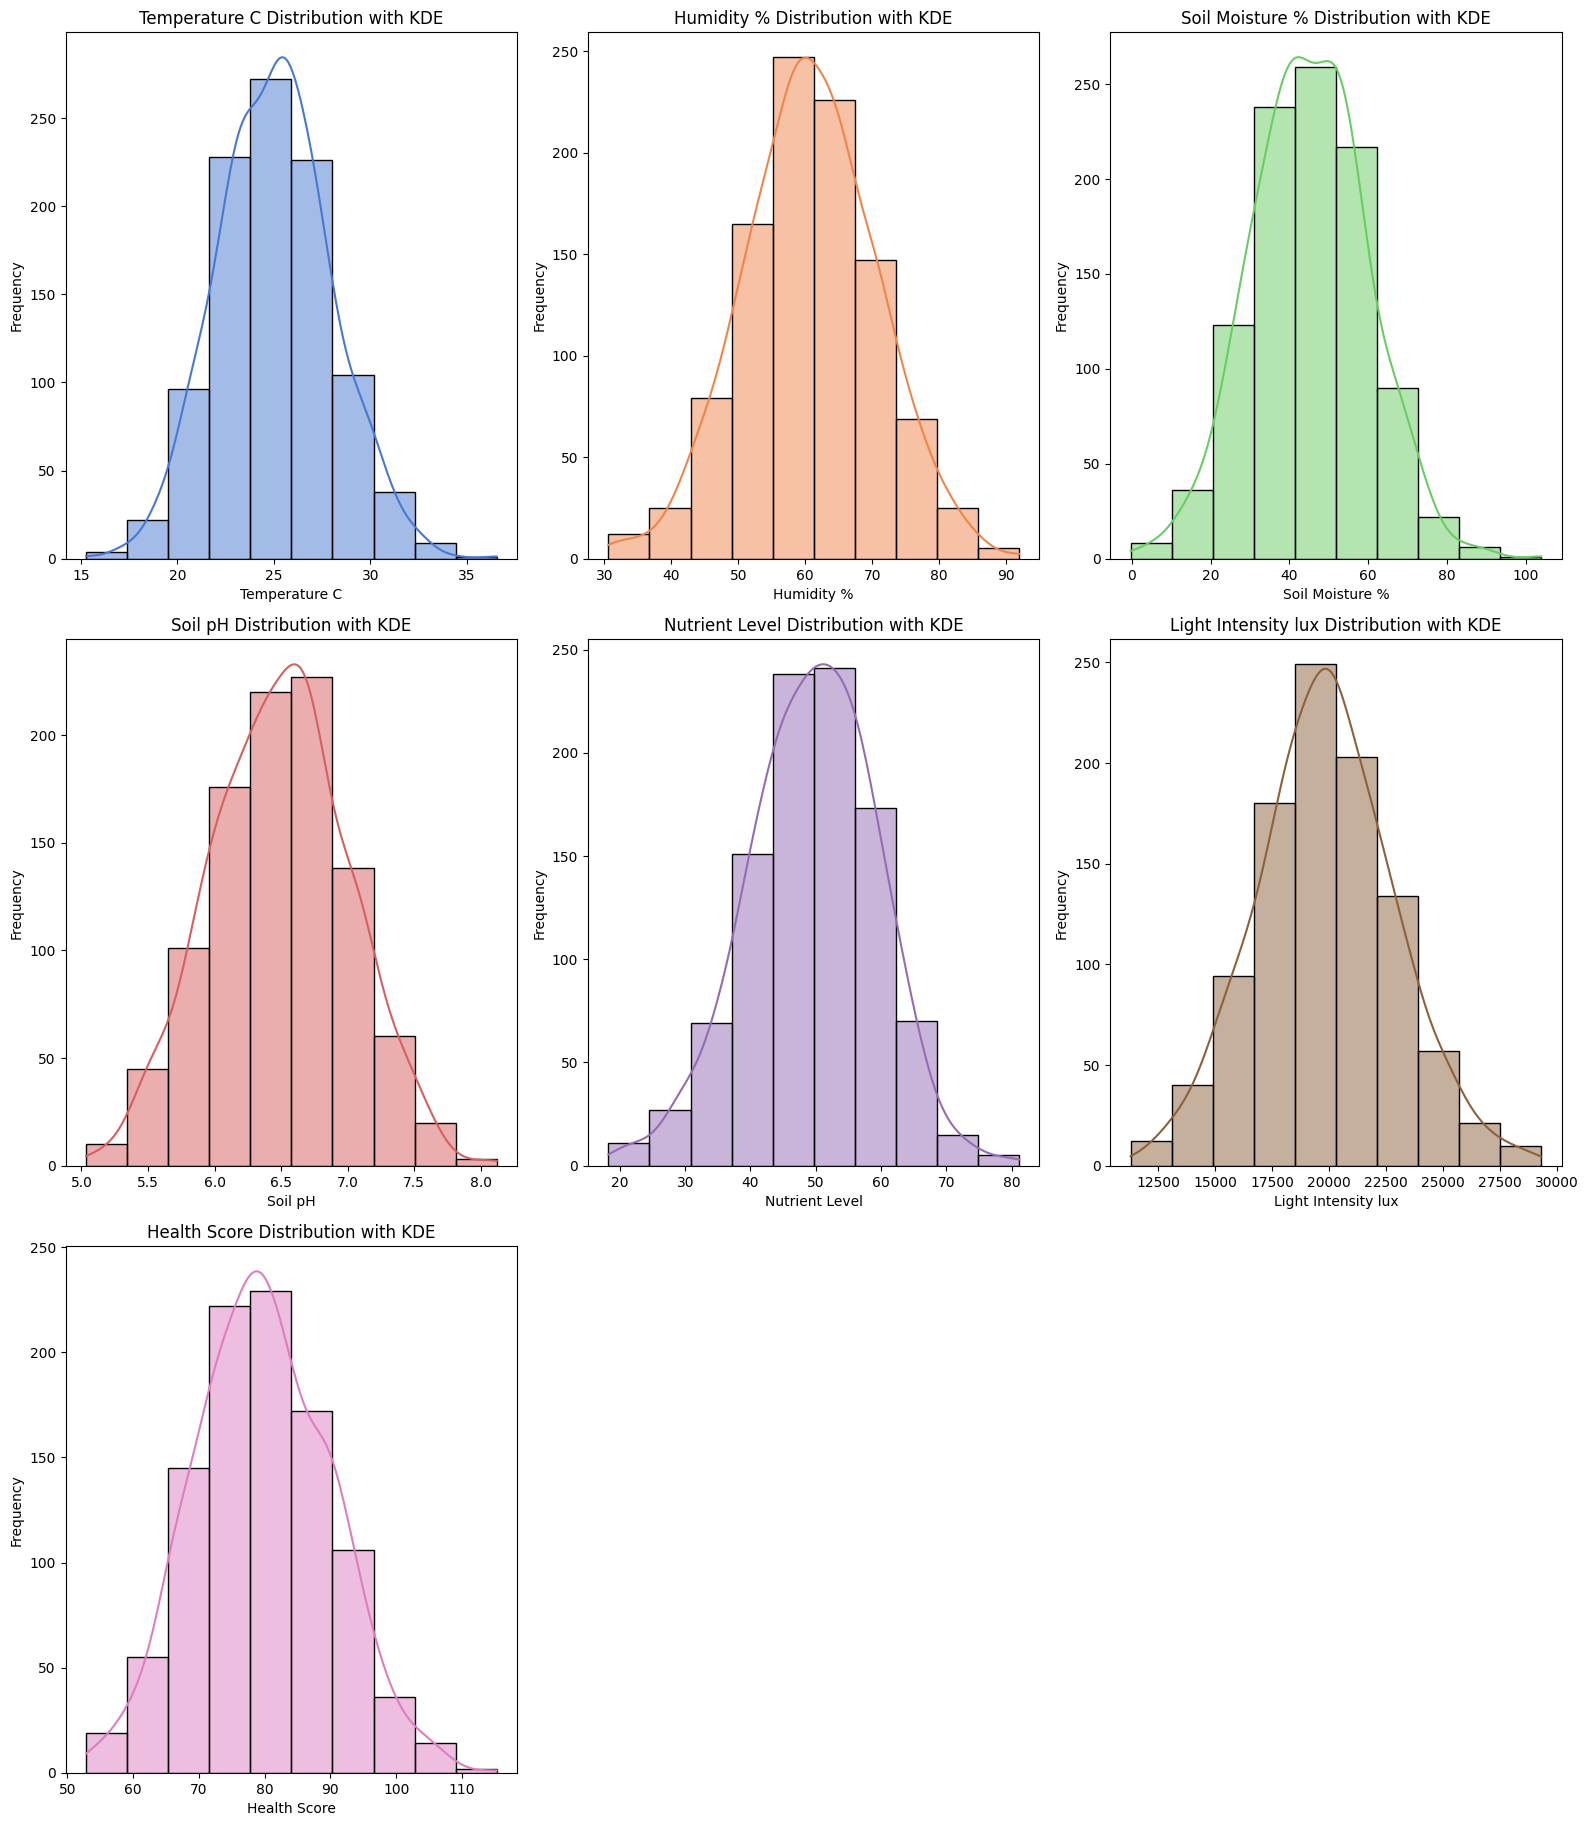

In [9]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(16, 24))  # Adjusted to accommodate more plots
    
    muted_colors = sns.color_palette("muted", len(columns))
    
    for i, column in enumerate(columns):
        plt.subplot(4, 3, i + 1)  
        sns.histplot(data[column], kde=True, bins=10, color=muted_colors[i])
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
columns_to_analyze = [
    'Temperature_C', 'Humidity_%', 'Soil_Moisture_%', 'Soil_pH', 'Nutrient_Level', 'Light_Intensity_lux', 'Health_Score'
]

# Perform univariate analysis
univariate_analysis(df, columns_to_analyze)

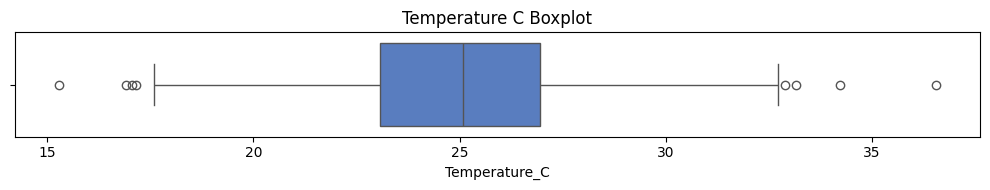


Summary Statistics for Temperature C:
 count    1000.000000
mean       25.057996
std         2.937648
min        15.276198
25%        23.057229
50%        25.075902
75%        26.943832
max        36.558194
Name: Temperature_C, dtype: float64


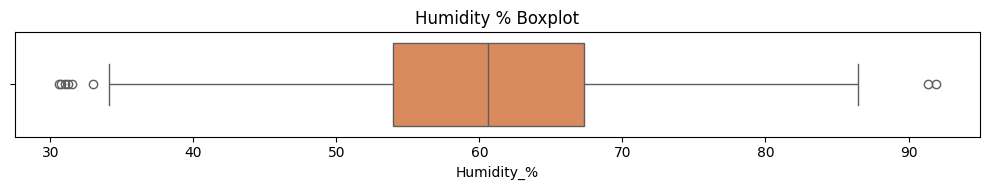


Summary Statistics for Humidity %:
 count    1000.000000
mean       60.708362
std         9.974544
min        30.596114
25%        53.937583
50%        60.630771
75%        67.288822
max        91.931076
Name: Humidity_%, dtype: float64


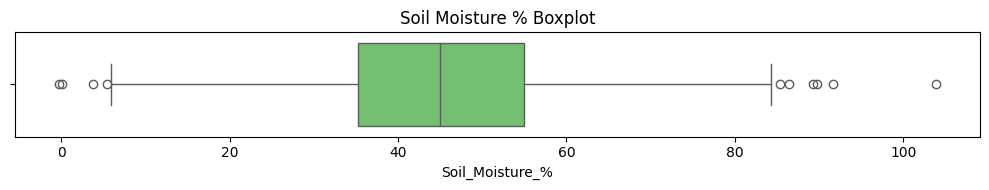


Summary Statistics for Soil Moisture %:
 count    1000.000000
mean       45.087513
std        14.751814
min        -0.292682
25%        35.280006
50%        44.996239
75%        54.913730
max       103.893566
Name: Soil_Moisture_%, dtype: float64


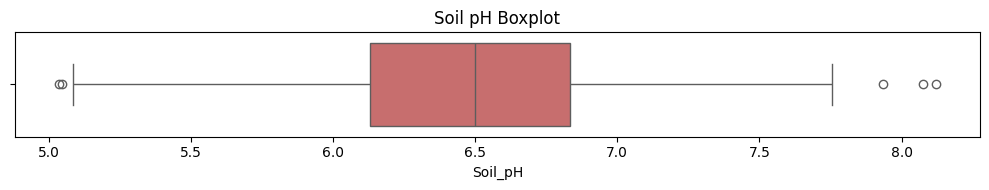


Summary Statistics for Soil pH:
 count    1000.000000
mean        6.490640
std         0.513566
min         5.035276
25%         6.131290
50%         6.500092
75%         6.833473
max         8.121546
Name: Soil_pH, dtype: float64


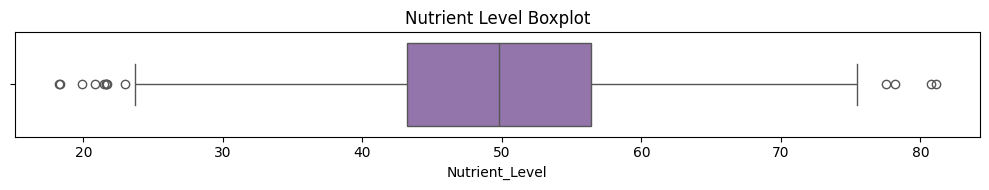


Summary Statistics for Nutrient Level:
 count    1000.000000
mean       49.507264
std         9.923802
min        18.232962
25%        43.173950
50%        49.817580
75%        56.391231
max        81.129102
Name: Nutrient_Level, dtype: float64


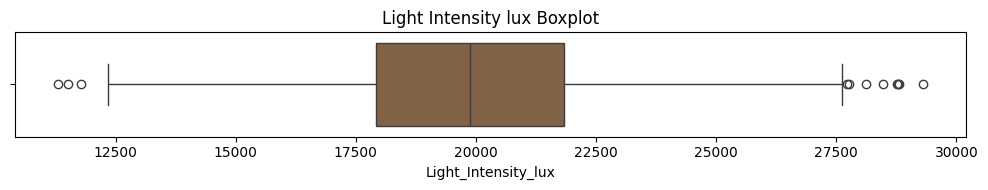


Summary Statistics for Light Intensity lux:
 count     1000.000000
mean     19859.787199
std       3022.167739
min      11301.458360
25%      17918.921580
50%      19871.518786
75%      21837.340538
max      29294.898302
Name: Light_Intensity_lux, dtype: float64


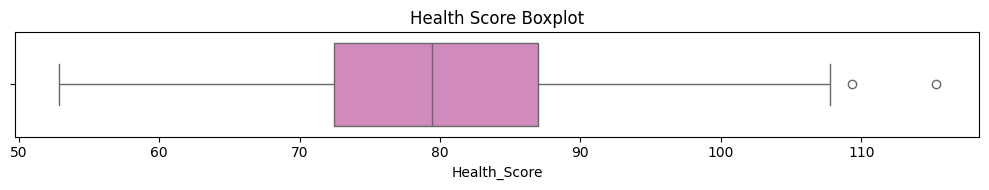


Summary Statistics for Health Score:
 count    1000.000000
mean       79.718435
std        10.250045
min        52.873874
25%        72.448627
50%        79.452536
75%        86.997451
max       115.290552
Name: Health_Score, dtype: float64


In [10]:
# Function to perform univariate analysis for numeric columns with boxplots and statistics
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    color = sns.color_palette("muted")[columns_to_analyze.index(column) % len(sns.color_palette("muted"))]
    
    sns.boxplot(x=data[column], color=color)
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = [
    'Temperature_C', 'Humidity_%', 'Soil_Moisture_%', 'Soil_pH', 'Nutrient_Level', 'Light_Intensity_lux', 'Health_Score'
]

# Iterate through columns and perform univariate analysis
for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

In [11]:
df.columns

Index(['Plant_ID', 'Temperature_C', 'Humidity_%', 'Soil_Moisture_%', 'Soil_pH',
       'Nutrient_Level', 'Light_Intensity_lux', 'Health_Score',
       'Health_Status'],
      dtype='object')

### **Summary of Categorization with Descriptions:**

| **Category**               | **Features**                                                                 | **Description**                                                                                     |
|-----------------------------|------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| **Plant Identification**    | `Plant_ID`                                                                  | Unique identifier for each plant.                 |
| **Soil Properties**          | `Soil_Moisture_%`, `Soil_pH`, `Nutrient_Level` | Physical and chemical characteristics of the soil, crucial for plant hydration, nutrition, and root health. |
| **Environmental Conditions** | `Temperature_C`, `Humidity_%`, `Light_Intensity_lux`                       | Surrounding environmental factors that influence plant growth and stress levels.                    |
| **Plant Health Indicators**  | `Health_Score`                            | Direct indicators of plant health |


In [12]:
def Subplot_Relationship_VS_Health_Status(properties):
    plt.figure(figsize=(16, 20))
    for i, feature in enumerate(properties):
        plt.subplot(3, 2, i + 1)
        sns.boxplot(x='Health_Status', y=feature, data=df, palette='muted', hue='Health_Status', legend=False)
        plt.title(f'{feature} vs Health Status')
        plt.xlabel('Health Status')
        plt.ylabel(feature.replace('_', ' '))
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

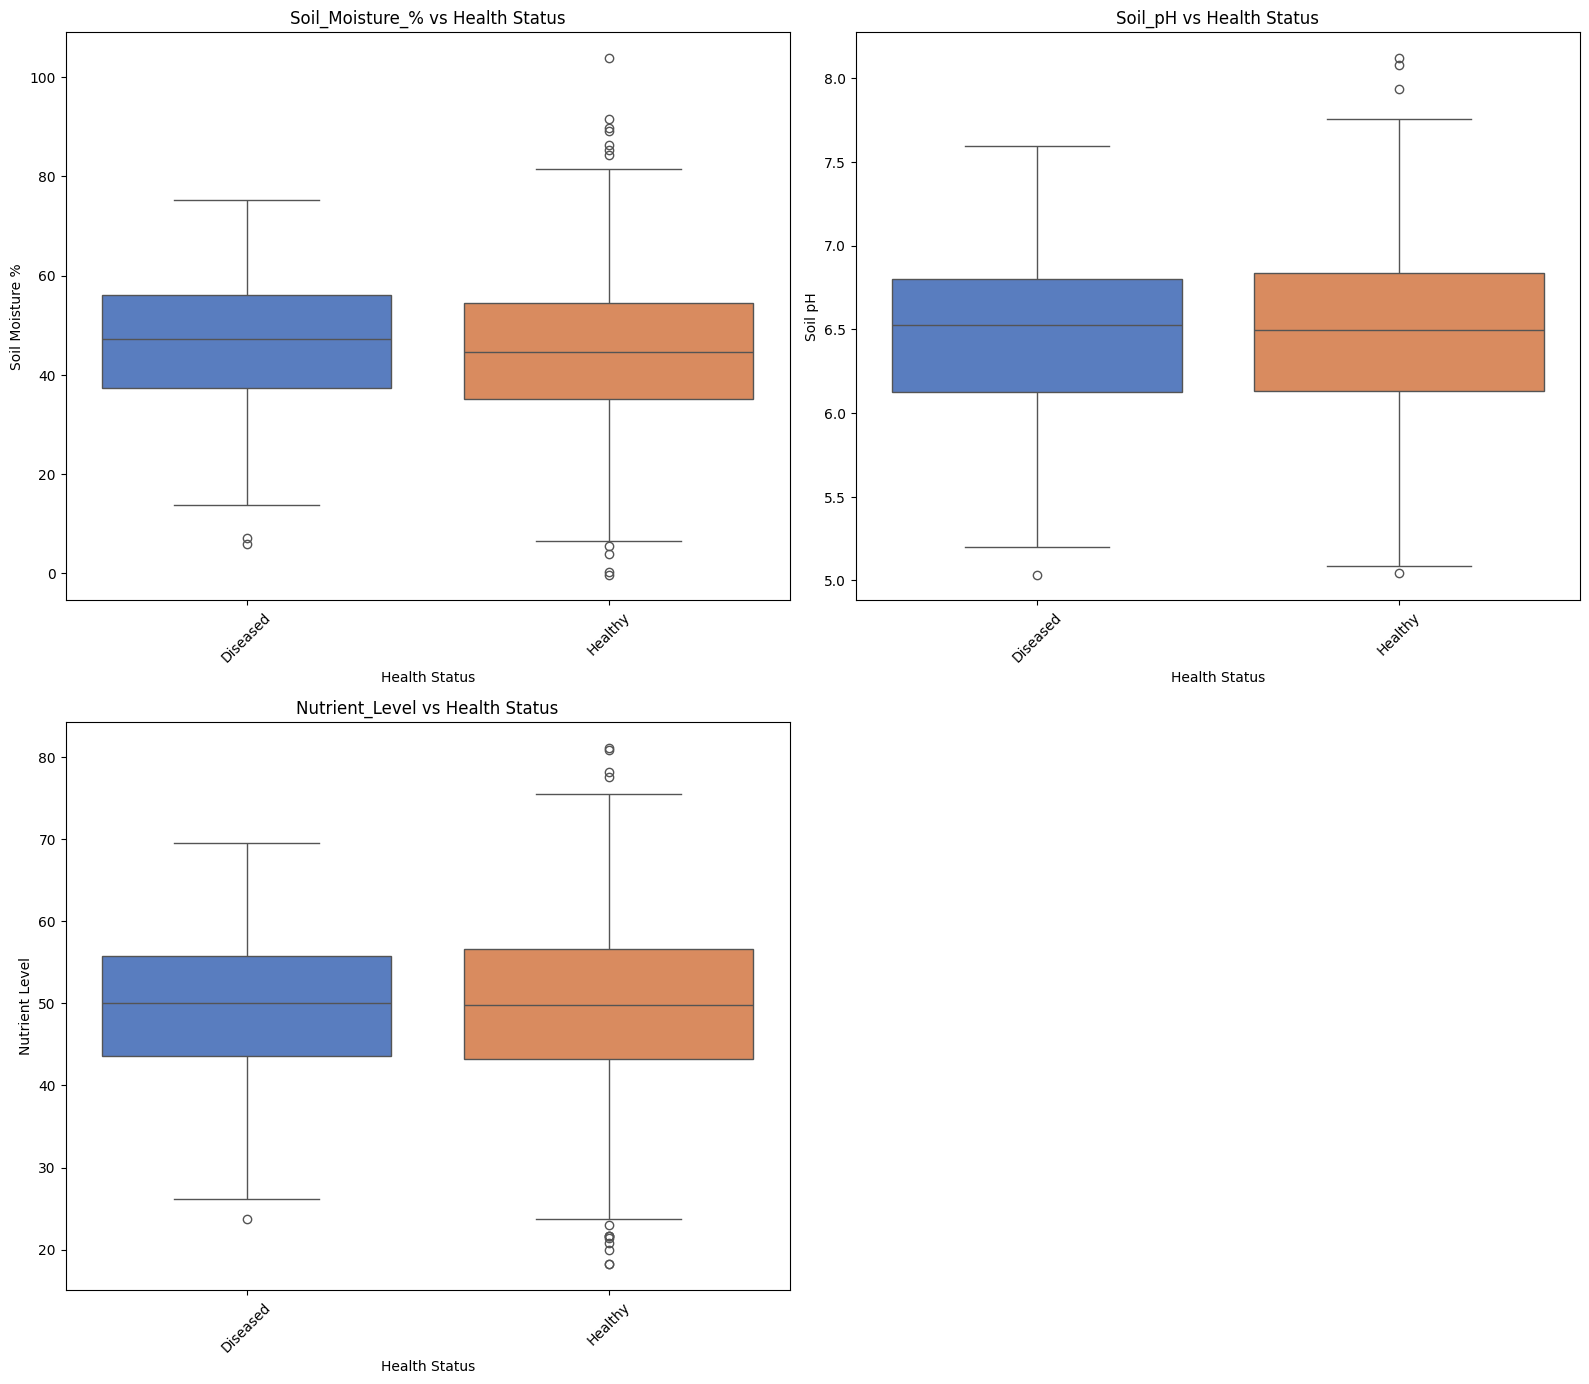

In [13]:
# Compare Health_Status with Soil Properties
# Define soil properties
soil_properties = [
    'Soil_Moisture_%', 'Soil_pH', 'Nutrient_Level'
]

# Create subplots to visualize the relationship between Health_Status and soil properties
Subplot_Relationship_VS_Health_Status(soil_properties)

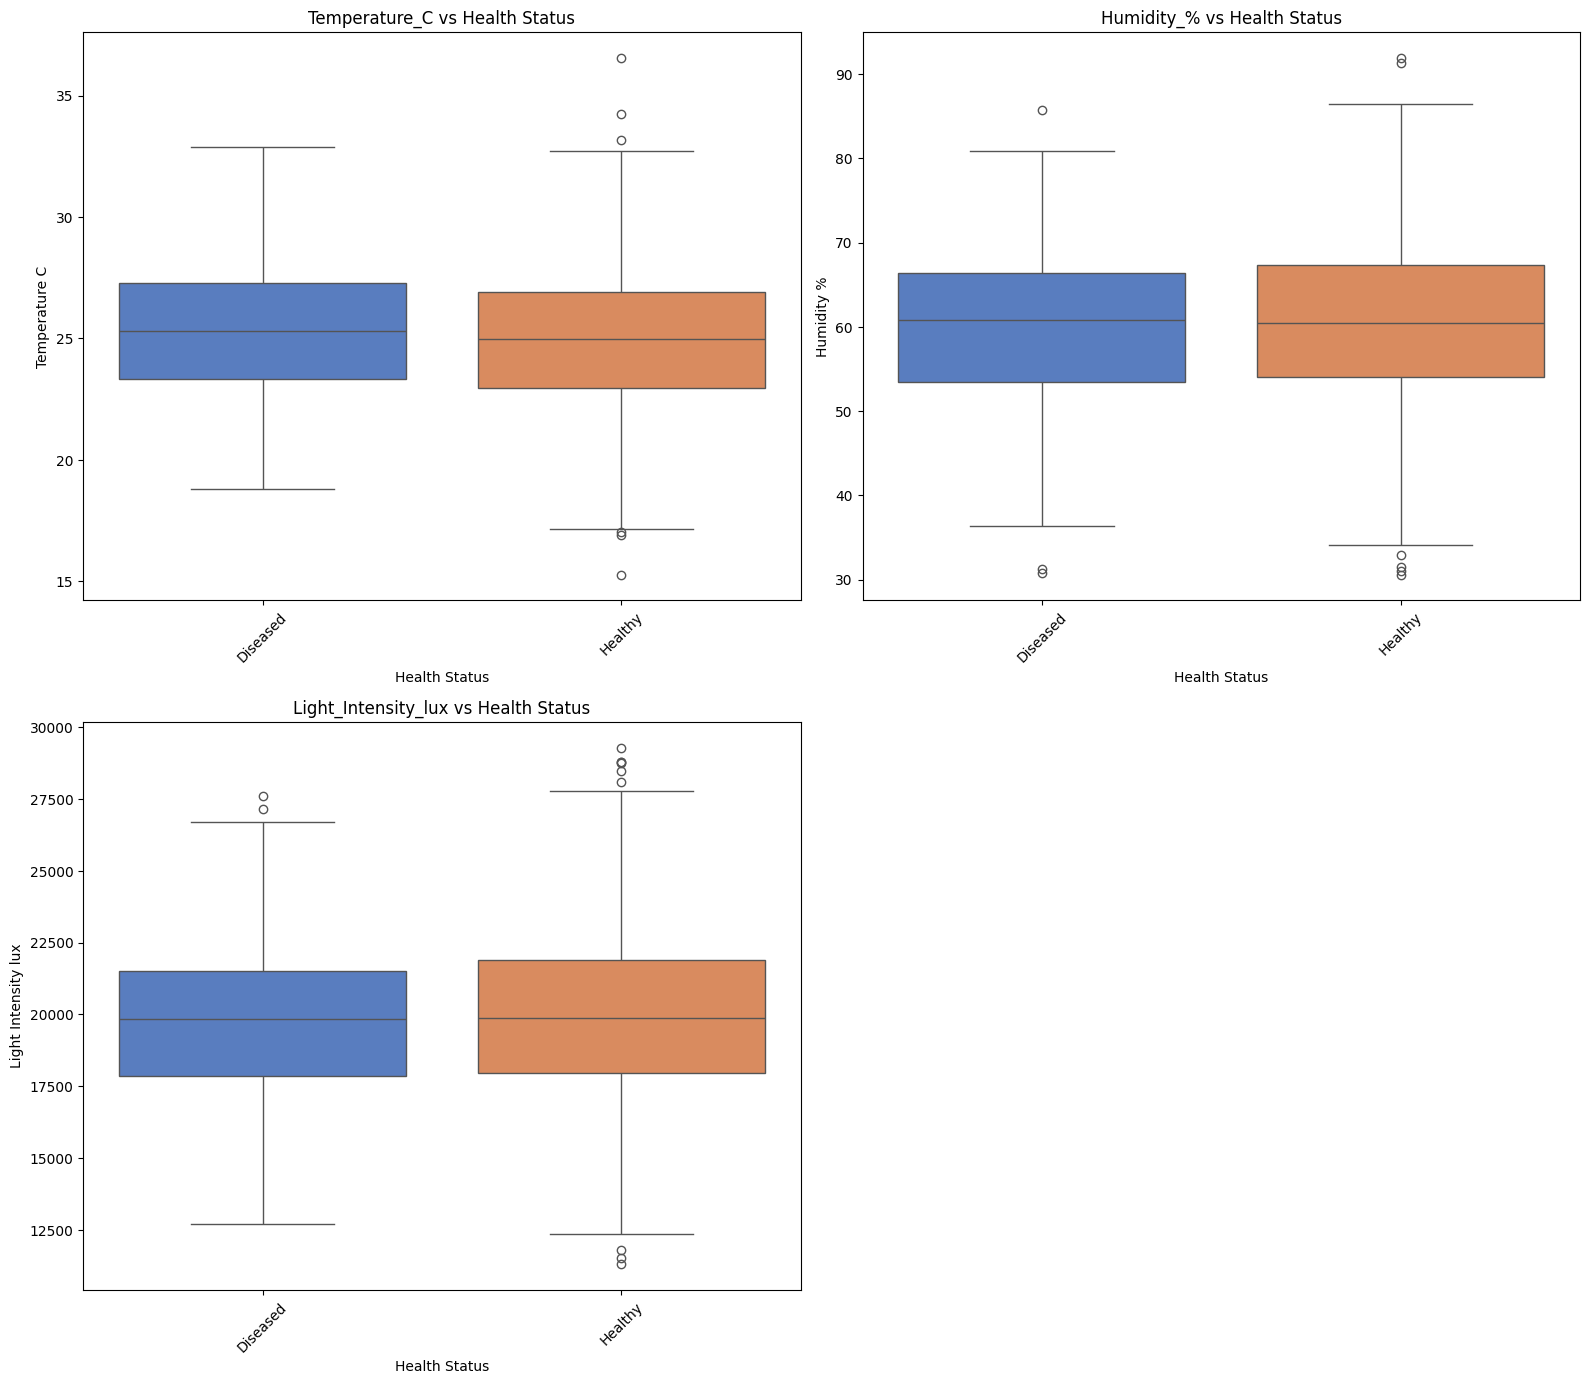

In [14]:
# Compare Health_Status with Environmental Conditions
# Define environmental condition features
environmental_conditions = [
    'Temperature_C', 'Humidity_%', 'Light_Intensity_lux'
]

# Create subplots to visualize the relationship between Health_Status and environmental conditions
Subplot_Relationship_VS_Health_Status(environmental_conditions)

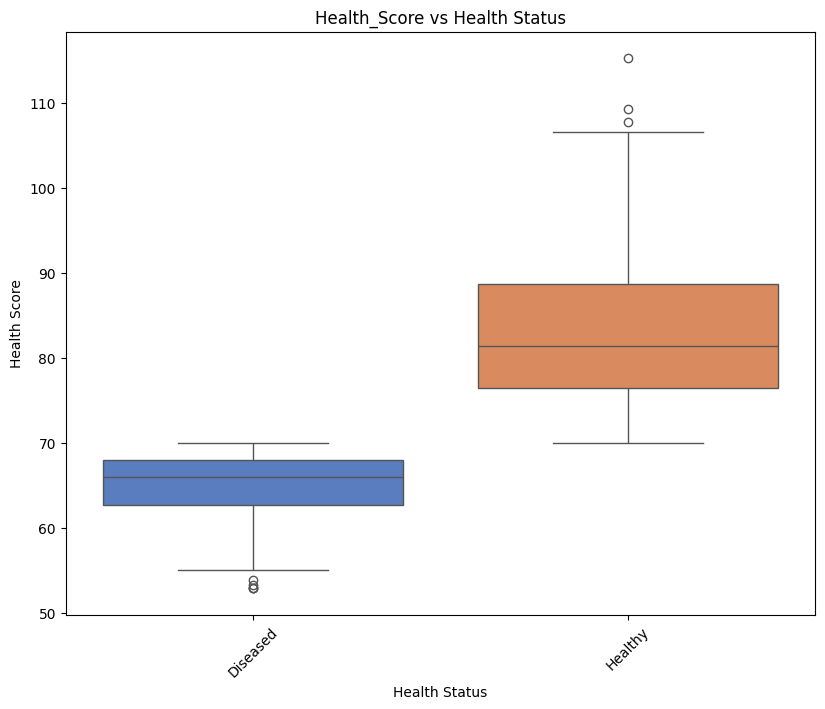

In [15]:
# Compare Health_Status with Plant Health Indicators

# Define plant health indicator features
health_indicators = [
    'Health_Score'
]

# Create subplots to visualize the relationship between Health_Status and plant health indicators
Subplot_Relationship_VS_Health_Status(health_indicators)

In [16]:
# Explore relationships between Health_Status, Plant Health Indicators, and Environmental Conditions

# Group data by Health_Status and calculate mean values
status_analysis_mean = df.groupby('Health_Status')[
    [*environmental_conditions, 'Health_Score']
].mean()

# Group data by Health_Status and calculate standard deviation
status_analysis_std = df.groupby('Health_Status')[
    [*environmental_conditions, 'Health_Score']
].std()

# Displaying the mean values table
print("----- Mean Values by Health Status -----")
display(status_analysis_mean)

# Displaying the standard deviation table
print("\n----- Standard Deviation by Health Status -----")
display(status_analysis_std)

----- Mean Values by Health Status -----


,Temperature_C,Humidity_%,Light_Intensity_lux,Health_Score
Health_Status,,,,
Diseased,25.426963,60.249798,19792.458792,64.904781
Healthy,24.980272,60.804961,19873.970181,82.838987



----- Standard Deviation by Health Status -----


,Temperature_C,Humidity_%,Light_Intensity_lux,Health_Score
Health_Status,,,,
Diseased,2.871233,10.319243,2822.642393,4.104544
Healthy,2.947266,9.904118,3063.977369,8.225386


In [17]:
# Explore relationships between Health_Status and Soil Properties

soil_mean = df.groupby('Health_Status')[soil_properties].mean()
soil_std = df.groupby('Health_Status')[soil_properties].std()

# Displaying the mean values table
print("----- Mean Soil Properties by Health Status -----")
display(soil_mean)

# Displaying the standard deviation table
print("\n----- Standard Deviation of Soil Properties by Health Status -----")
display(soil_std)

----- Mean Soil Properties by Health Status -----


,Soil_Moisture_%,Soil_pH,Nutrient_Level
Health_Status,,,
Diseased,46.301147,6.480075,49.326966
Healthy,44.831857,6.492866,49.545244



----- Standard Deviation of Soil Properties by Health Status -----


,Soil_Moisture_%,Soil_pH,Nutrient_Level
Health_Status,,,
Diseased,14.415676,0.502474,9.651557
Healthy,14.817545,0.516144,9.985512


In [18]:
def FacetGridplot_Relationship_VS_HealthStatus(properties):
    for condition in properties:
        g = sns.FacetGrid(
            df, 
            col='Health_Status', 
            height=4, 
            aspect=1.2, 
            sharex=True, 
            sharey=True, 
        )
        g.map(sns.histplot, condition, kde=True, bins=10, color=None)
        g.set_axis_labels(condition.replace('_', ' '), 'Frequency')
        g.set_titles("{col_name} - Health Status")
        g.fig.subplots_adjust(top=0.85)  
        g.fig.suptitle(
            f'Distribution of {condition.replace("_", " ")} by Health Status', 
            fontsize=16, 
            y=0.98  
        )
        plt.show()

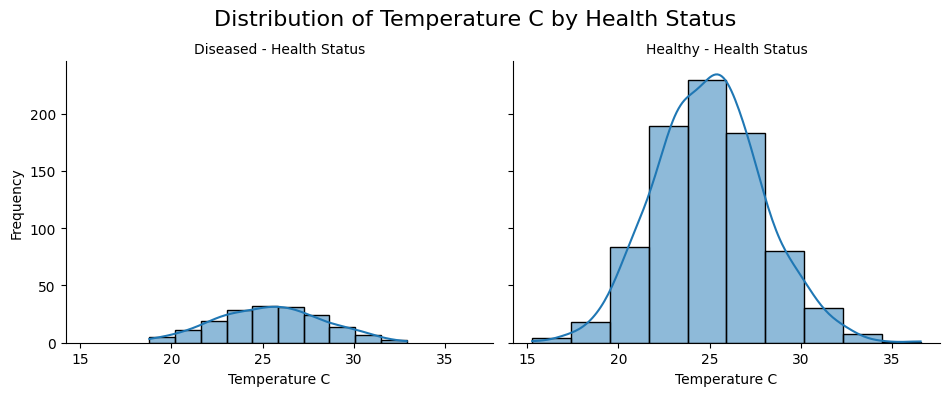

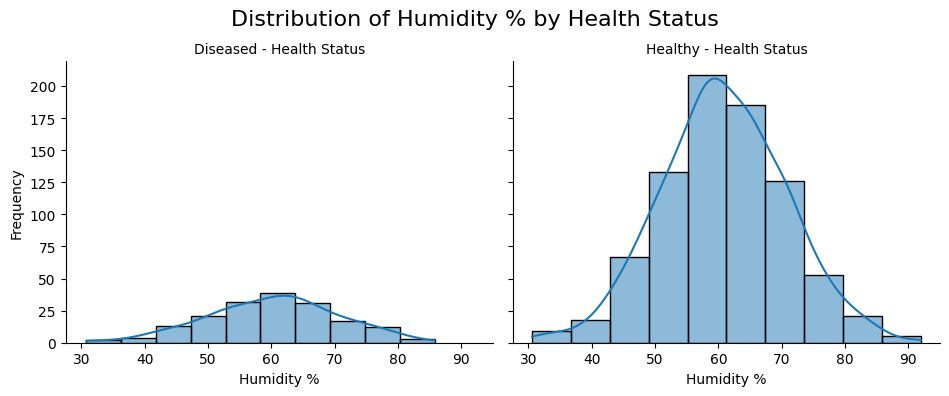

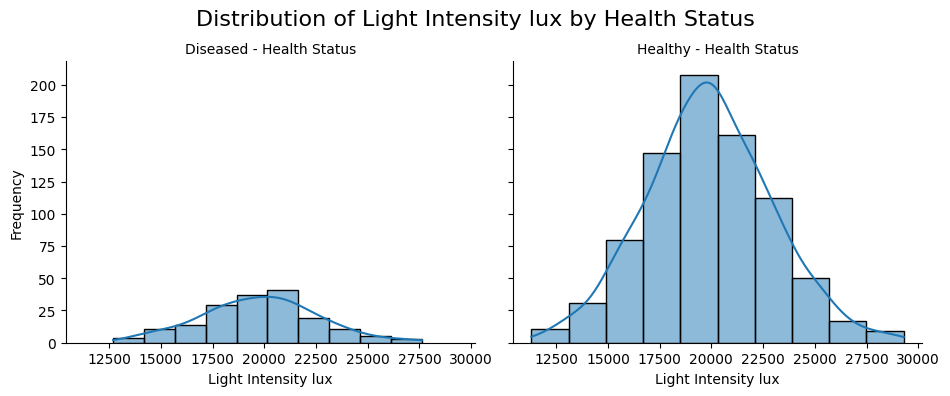

In [19]:
# Environmental Conditions vs Health_Status using FacetGrid with improved styling

# Create FacetGrid plots for each environmental condition with improved styling
FacetGridplot_Relationship_VS_HealthStatus(environmental_conditions)


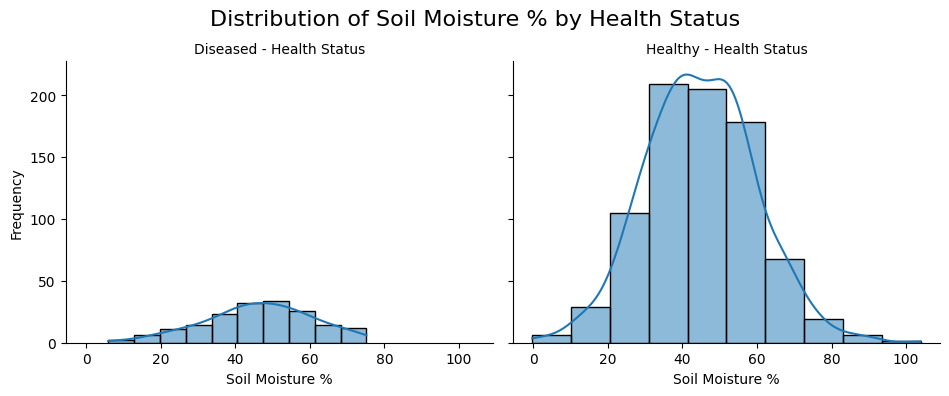

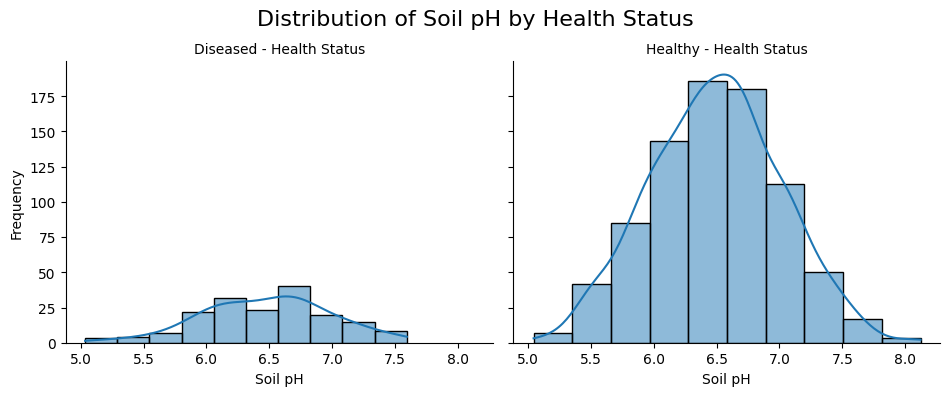

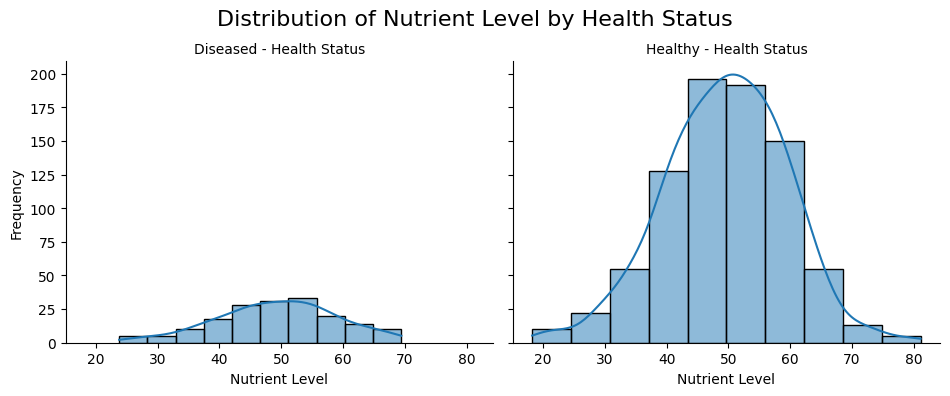

In [20]:
# Soil Properties vs Health_Status using FacetGrid

# Create FacetGrid plots for each soil property
FacetGridplot_Relationship_VS_HealthStatus(soil_properties)

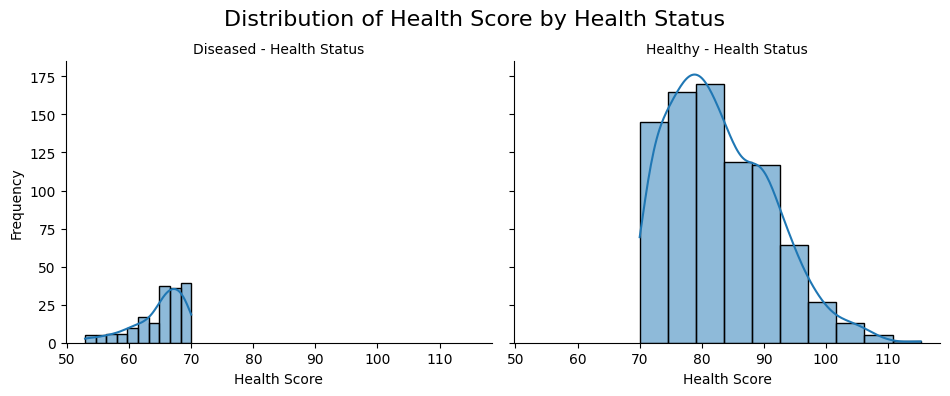

In [21]:
# Define plant health indicators to plot
health_indicators = ['Health_Score']

# Create FacetGrid plots for each health indicator
FacetGridplot_Relationship_VS_HealthStatus(health_indicators)

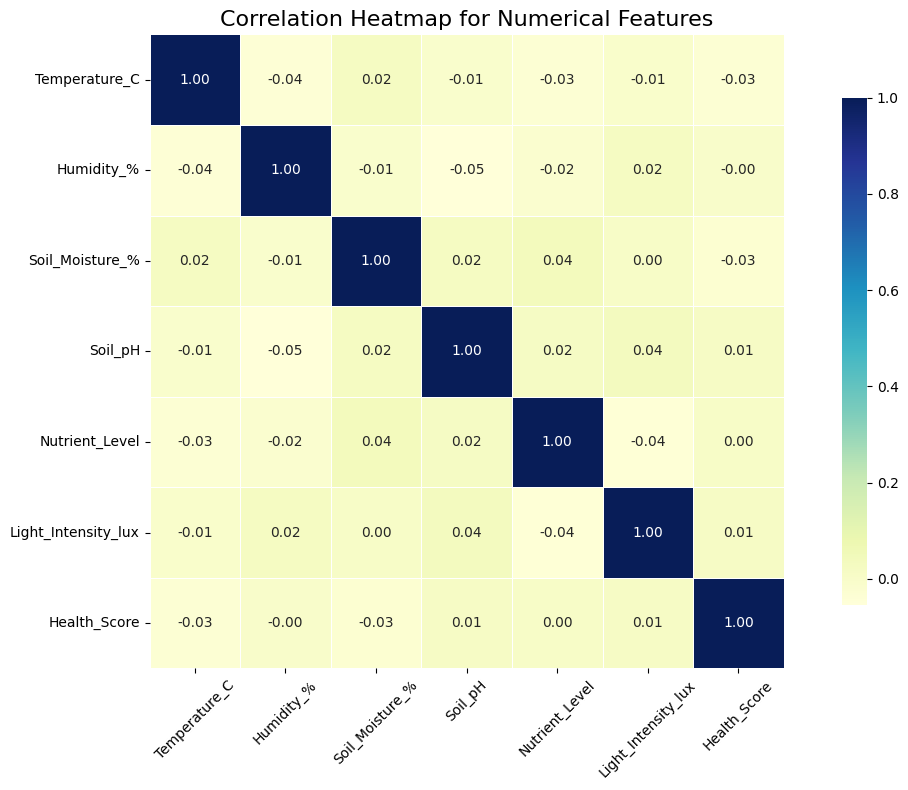

In [22]:
numerical_features = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='YlGnBu', 
    square=True, 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Heatmap for Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Detailed Insights from Correlation Table:
1. Strongest Positive Correlations:
   * Nutrient_Level and Soil_Moisture_% (~0.04):
   * Ligth_Intensity_lux and Soil_PH: (~0.04)
2. Strongest Negative Correlations:
   * Humidity_% and Soil_PH (~-0.05)
   * Humidity_% and Temperature_C (~-0.04)
   * Light_Intensity_Lux and Nutrient_Level (~-0.04)
3. Relationship between Soil properties:
   * Soil_Moisture_% and Soil_pH (~-0.044):
        A weak negative correlation indicates that higher soil moisture might marginally lower soil pH.

# Data Preprocessing

## Nettoyage

In [23]:
# supprimer la premiere colonne de count
df = df.drop(df.columns[0], axis=1)

df.head()

,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status
0,26.490142,73.993554,34.872326,5.546096,41.365064,18728.720954,68.859186,Diseased
1,24.585207,69.246337,42.832220,6.069807,49.687965,18639.757675,73.690692,Healthy
2,26.943066,60.596304,33.113701,6.293197,50.180169,14613.070482,70.579398,Healthy
3,29.569090,53.530632,40.380577,7.443844,54.726303,19009.729425,74.520042,Healthy
4,24.297540,66.982233,16.595780,6.778277,36.331416,22198.487245,77.858497,Healthy


## Transformation des données

### Imputation

In [24]:
# Vérifier si n'importe quelle colonne contient des valeurs manquantes
df.isnull().any()

Temperature_C          False
Humidity_%             False
Soil_Moisture_%        False
Soil_pH                False
Nutrient_Level         False
Light_Intensity_lux    False
Health_Score           False
Health_Status          False
dtype: bool

Pas de cellules vide donc pas d'imputeur à utiliser

### Encoder

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Health_Status'] = le.fit_transform(df['Health_Status'])

# {'Diseased': 0, 'Healthy': 1}
df.head()

,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status
0,26.490142,73.993554,34.872326,5.546096,41.365064,18728.720954,68.859186,0
1,24.585207,69.246337,42.832220,6.069807,49.687965,18639.757675,73.690692,1
2,26.943066,60.596304,33.113701,6.293197,50.180169,14613.070482,70.579398,1
3,29.569090,53.530632,40.380577,7.443844,54.726303,19009.729425,74.520042,1
4,24.297540,66.982233,16.595780,6.778277,36.331416,22198.487245,77.858497,1


### Correlations

In [26]:
# Calculate correlations
correlations = df.corr()['Health_Status'].sort_values(ascending=False)

# Convert to DataFrame
correlation_table = correlations.to_frame(name='Correlation with Health_Status').reset_index()
correlation_table.rename(columns={'index': 'Feature'}, inplace=True)

# Display the table
display(correlation_table)

,Feature,Correlation with Health_Status
0,Health_Status,1.000000
1,Health_Score,0.663649
2,Humidity_%,0.021111
3,Light_Intensity_lux,0.010230
4,Soil_pH,0.009447
5,Nutrient_Level,0.008343
6,Soil_Moisture_%,-0.037778
7,Temperature_C,-0.057675


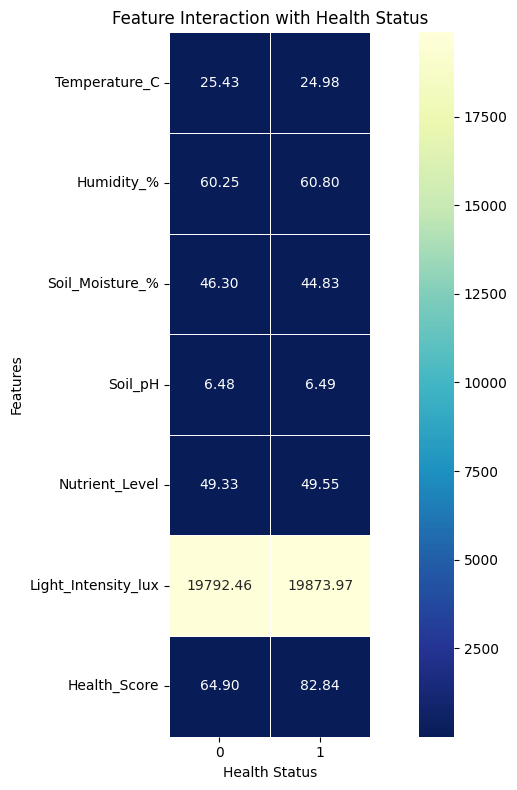

In [27]:
# Ensure 'Health_Status' is included and calculate mean values
status_correlation = df.groupby('Health_Status').mean().T

plt.figure(figsize=(10, 8))
sns.heatmap(status_correlation, annot=True, cmap='YlGnBu_r', fmt='.2f', linewidths=0.5, square=True, cbar_kws={"shrink": 1})
plt.title('Feature Interaction with Health Status')
plt.ylabel('Features')
plt.xlabel('Health Status')
plt.tight_layout()
plt.show()

## Preparation des données

### Séparation features et label

Enlever la colonne Disease pour séparer "features" et "label" dans le train pour entrainer le model et on le met dans le test pour tester le model

In [28]:
# Define features and target
X = df.drop(columns=['Health_Status'])  # Features
y = df['Health_Status']  # Target

### train test split

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Display the shapes of the splits for verification
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (600, 7)
X_test Shape: (400, 7)
y_train Shape: (600,)
y_test Shape: (400,)


In [30]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "KNN Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Display model names to confirm initialization
print("Models initialized:", list(models.keys()))

Models initialized: ['Logistic Regression', 'KNN Classifier', 'Decision Tree', 'Random Forest', 'Gradient Boosting']



Model: Logistic Regression
Accuracy: 0.97
AUC: 1.00


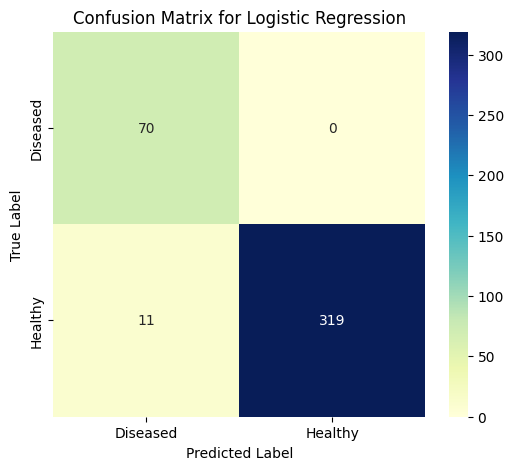

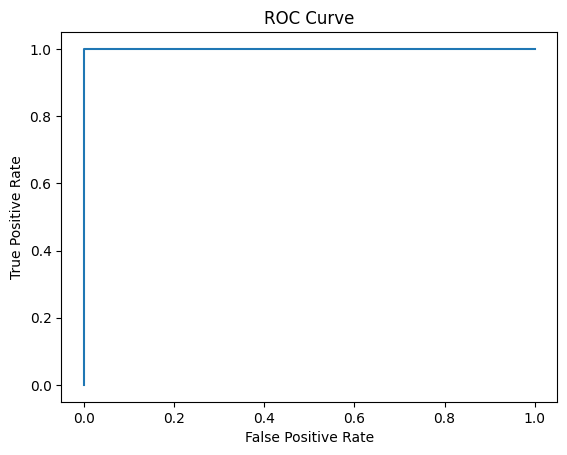

              precision    recall  f1-score   support

    Diseased       0.86      1.00      0.93        70
     Healthy       1.00      0.97      0.98       330

    accuracy                           0.97       400
   macro avg       0.93      0.98      0.96       400
weighted avg       0.98      0.97      0.97       400


Model: KNN Classifier
Accuracy: 0.91
AUC: 0.95


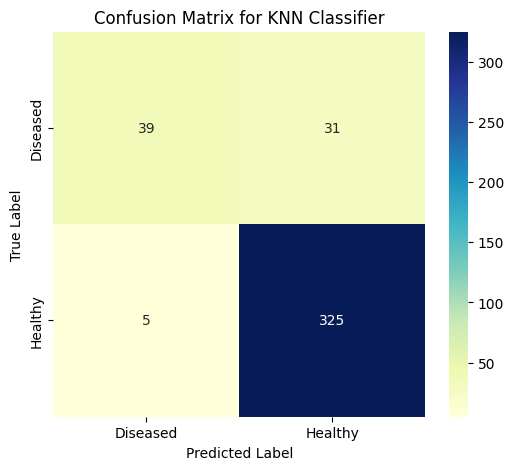

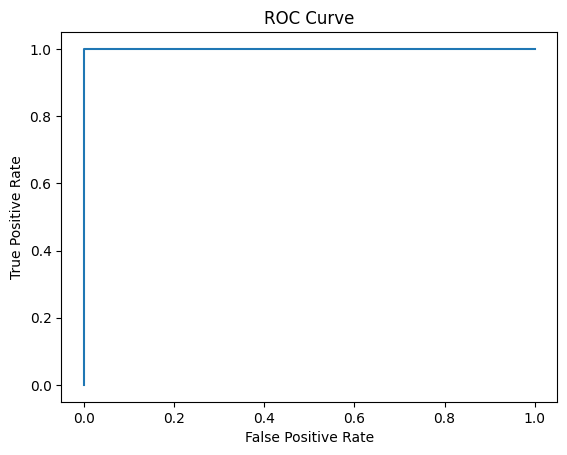

              precision    recall  f1-score   support

    Diseased       0.89      0.56      0.68        70
     Healthy       0.91      0.98      0.95       330

    accuracy                           0.91       400
   macro avg       0.90      0.77      0.82       400
weighted avg       0.91      0.91      0.90       400


Model: Decision Tree
Accuracy: 1.00
AUC: 1.00


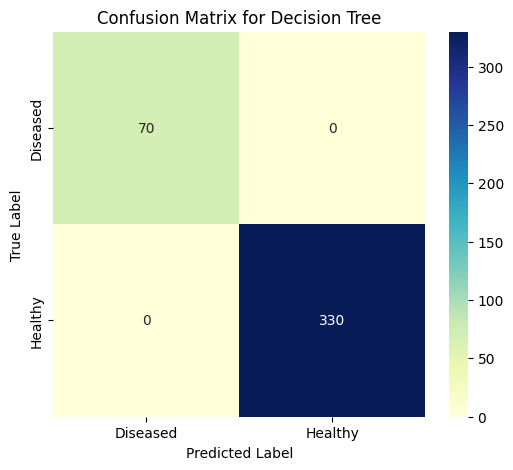

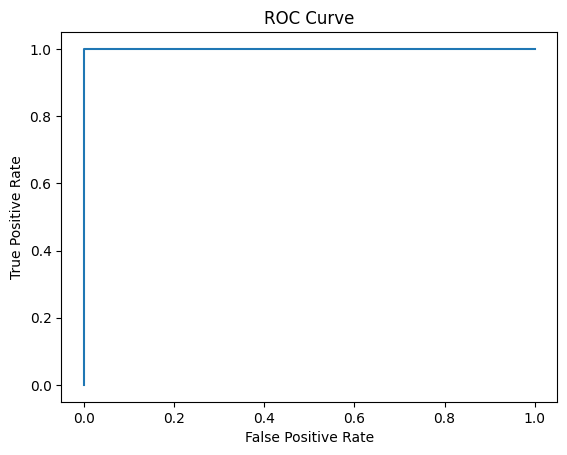

              precision    recall  f1-score   support

    Diseased       1.00      1.00      1.00        70
     Healthy       1.00      1.00      1.00       330

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Model: Random Forest
Accuracy: 1.00
AUC: 1.00


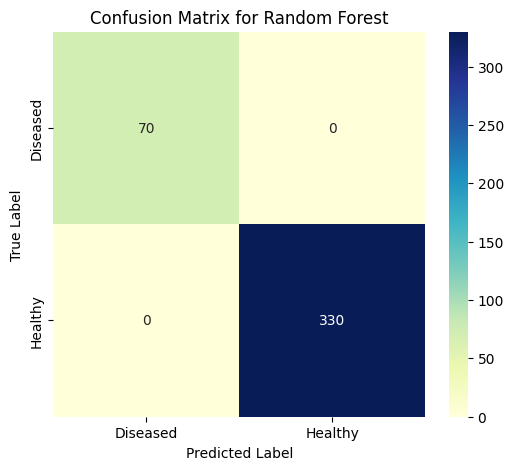

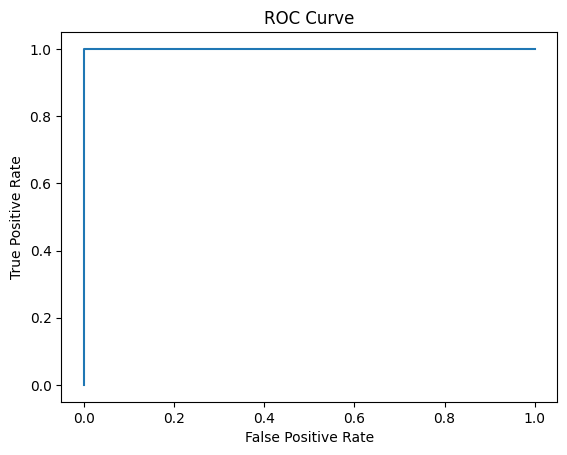

              precision    recall  f1-score   support

    Diseased       1.00      1.00      1.00        70
     Healthy       1.00      1.00      1.00       330

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Model: Gradient Boosting
Accuracy: 1.00
AUC: 1.00


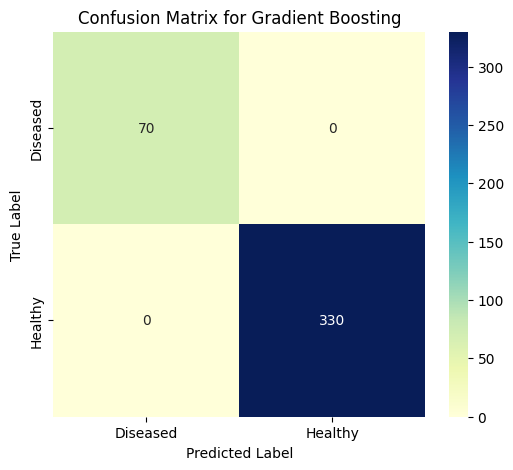

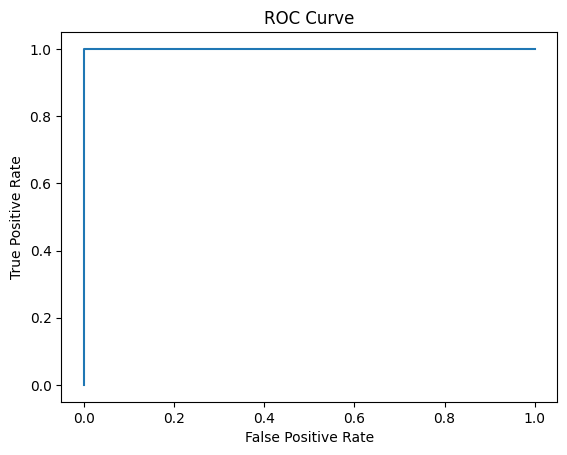

              precision    recall  f1-score   support

    Diseased       1.00      1.00      1.00        70
     Healthy       1.00      1.00      1.00       330

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Initialize lists to store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate AUC
    if hasattr(model, "predict_proba"):  
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = None

    # Store results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, target_names=['Diseased', 'Healthy'])
    })

# Display results for each model
for result in results:
    print(f"\nModel: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    if result["AUC"] is not None:
        print(f"AUC: {result['AUC']:.2f}")
    
    # Confusion Matrix Visualization
    cm = result["Confusion Matrix"]
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Diseased', 'Healthy'], 
                yticklabels=['Diseased', 'Healthy'])
    plt.title(f'Confusion Matrix for {result["Model"]}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Calcul et tracé de la courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    # Print Classification Report
    print(result["Classification Report"])

In [33]:
# Prepare a summary table for model evaluation
evaluation_summary = []

# Extract the key metrics for each model
for result in results:
    evaluation_summary.append({
        "Model": result["Model"],
        "Accuracy": result["Accuracy"],
        "AUC": result["AUC"]
    })

evaluation_summary_df = pd.DataFrame(evaluation_summary)

# Sort by accuracy and display
display(evaluation_summary_df.sort_values(by="Accuracy", ascending=False))

,Model,Accuracy,AUC
2,Decision Tree,1.0000,1.000000
4,Gradient Boosting,1.0000,1.000000
3,Random Forest,1.0000,1.000000
0,Logistic Regression,0.9725,1.000000
1,KNN Classifier,0.9100,0.945476


In [34]:
# Select the Model with the Highest AUC
best_model_name = max(results, key=lambda x: x["AUC"] if x["AUC"] is not None else -1)["Model"]
best_model_name = "Decision Tree"
best_model = models[best_model_name]
print(f"The best model based on AUC is: {best_model_name}")

The best model based on AUC is: Decision Tree


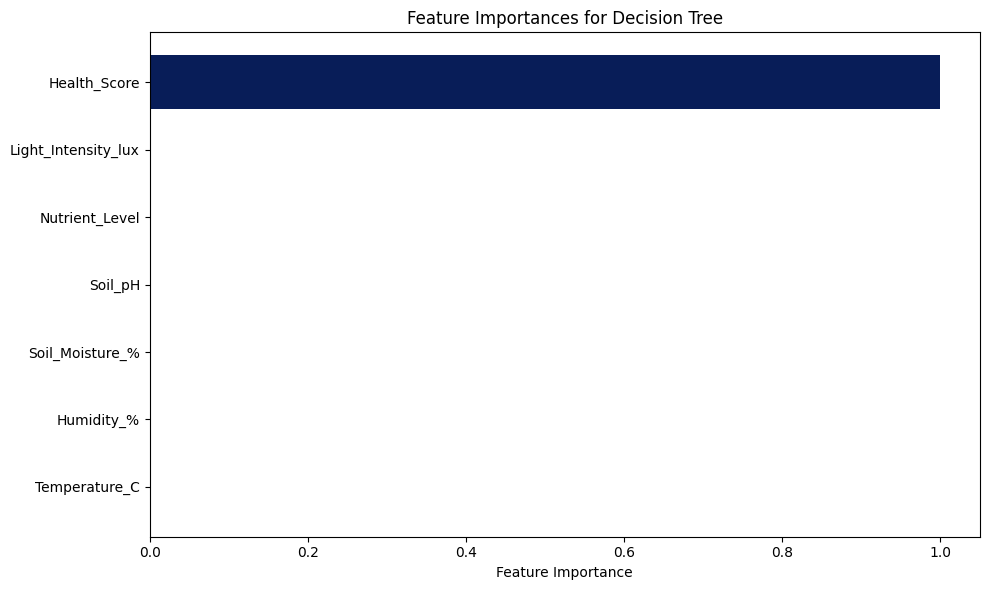

In [35]:
# Plot the Feature Importances
if hasattr(best_model, "feature_importances_"):  # Check if the model has feature_importances_
    feature_importances = best_model.feature_importances_
    feature_names = X.columns

    plt.figure(figsize=(10, 6))
    sorted_idx = feature_importances.argsort()[::-1]

    # Using color palette 'winter' for the bars
    colors = plt.cm.YlGnBu_r(np.linspace(0, 1, len(feature_importances)))

    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color=colors)
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importances for {best_model_name}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"{best_model_name} does not support feature importances.")

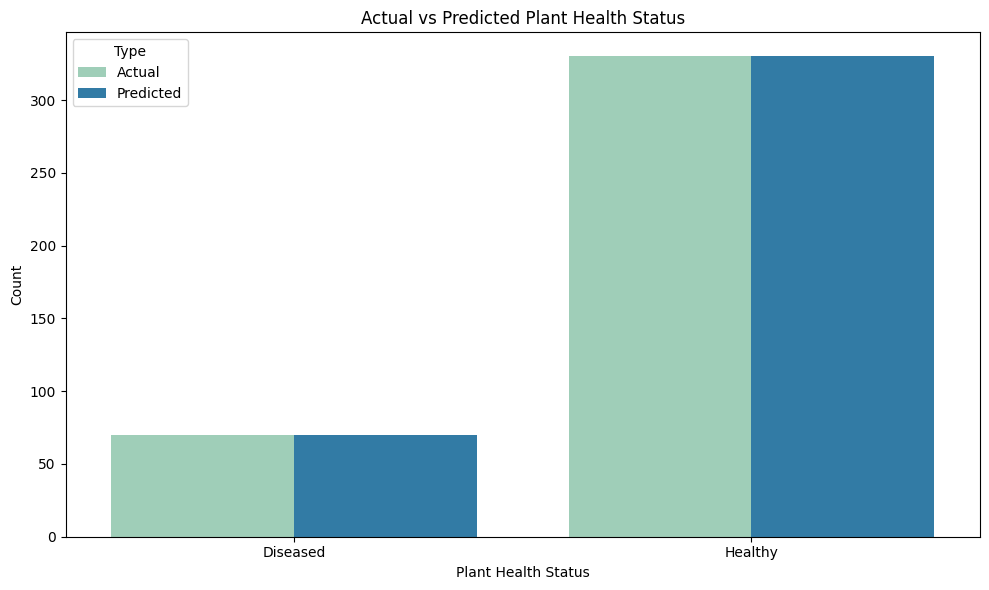

In [36]:
plt.figure(figsize=(10, 6))

# Convert the actual and predicted values to a DataFrame for comparison
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test,
    'Predicted': best_model.predict(X_test_scaled)
})

sns.countplot(
    data=actual_vs_predicted.melt(var_name='Type', value_name='Health Status'),
    x='Health Status', hue='Type', palette='YlGnBu'
)

plt.xticks([0, 1], labels=["Diseased", "Healthy"])
plt.xlabel("Plant Health Status")
plt.ylabel("Count")
plt.title("Actual vs Predicted Plant Health Status")
plt.legend(title="Type", loc="upper left")
plt.tight_layout()
plt.show()

## Remove Health_Score

In [37]:
X = df.drop(columns=['Health_Status', 'Health_Score'])  # Features

In [38]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Display the shapes of the splits for verification
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (600, 6)
X_test Shape: (400, 6)
y_train Shape: (600,)
y_test Shape: (400,)


In [39]:

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Poste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Poste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Poste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati


Model: Logistic Regression
Accuracy: 0.56
AUC: 0.55

Log loss: 15.95


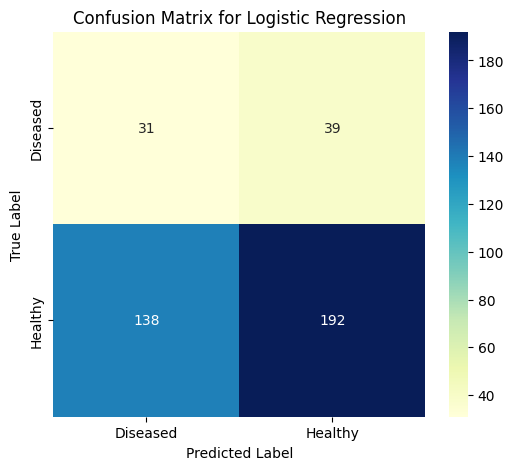

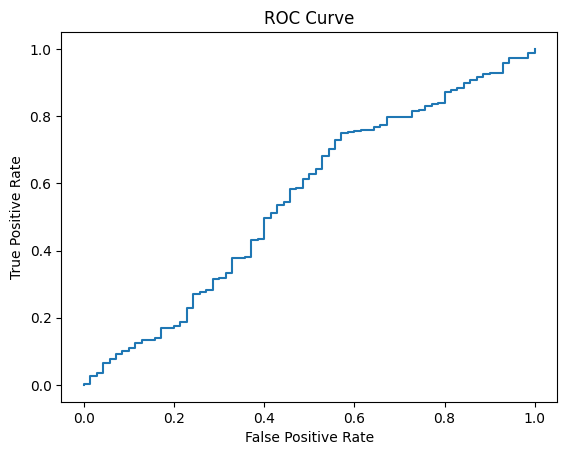

              precision    recall  f1-score   support

    Diseased       0.18      0.44      0.26        70
     Healthy       0.83      0.58      0.68       330

    accuracy                           0.56       400
   macro avg       0.51      0.51      0.47       400
weighted avg       0.72      0.56      0.61       400


Model: KNN Classifier
Accuracy: 0.81
AUC: 0.51

Log loss: 6.85


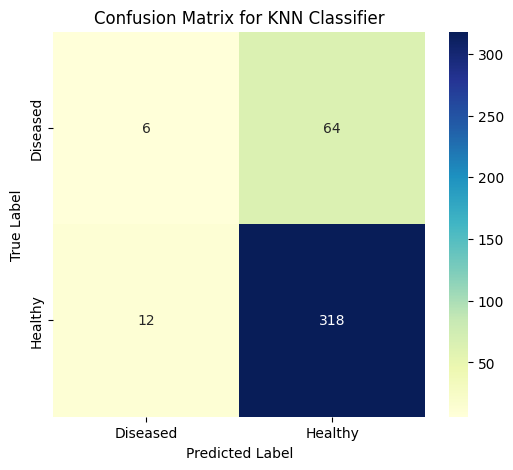

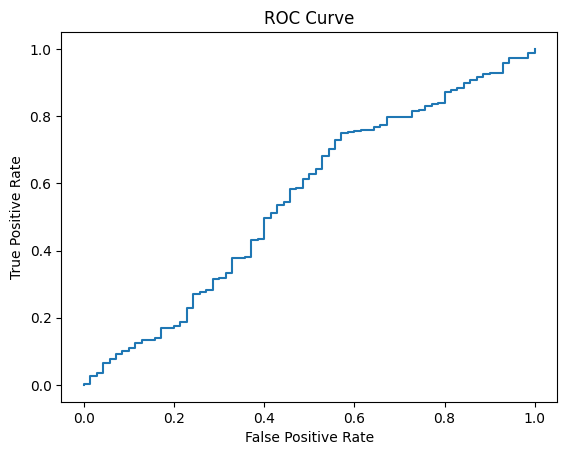

              precision    recall  f1-score   support

    Diseased       0.33      0.09      0.14        70
     Healthy       0.83      0.96      0.89       330

    accuracy                           0.81       400
   macro avg       0.58      0.52      0.51       400
weighted avg       0.75      0.81      0.76       400


Model: Decision Tree
Accuracy: 0.69
AUC: 0.49

Log loss: 10.99


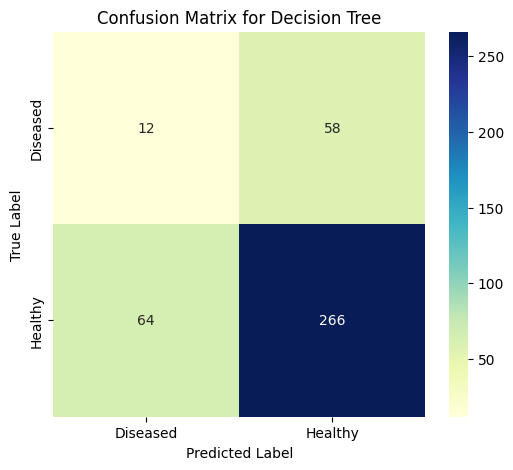

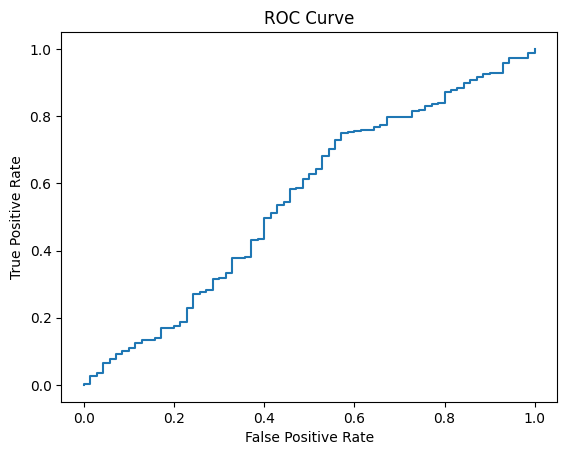

              precision    recall  f1-score   support

    Diseased       0.16      0.17      0.16        70
     Healthy       0.82      0.81      0.81       330

    accuracy                           0.69       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.70      0.69      0.70       400


Model: Random Forest
Accuracy: 0.82
AUC: 0.50

Log loss: 6.31


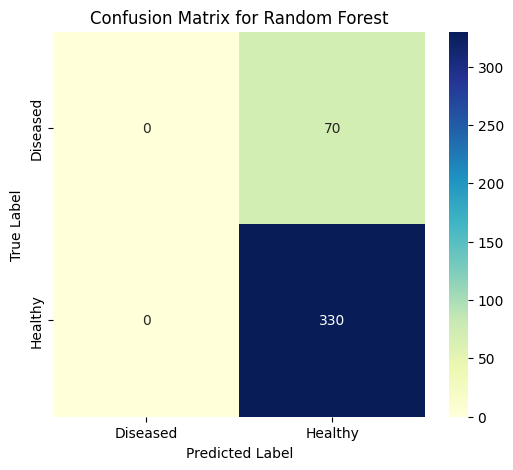

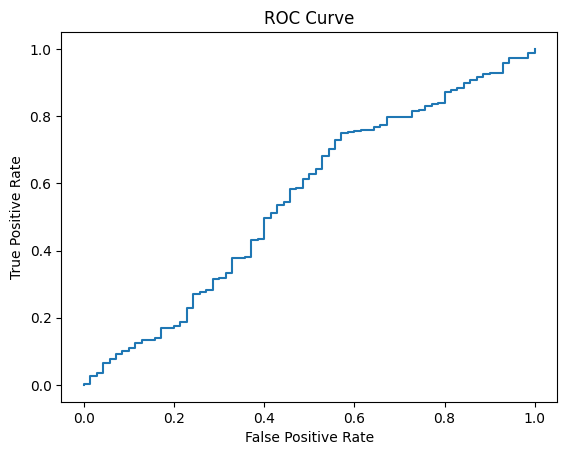

              precision    recall  f1-score   support

    Diseased       0.00      0.00      0.00        70
     Healthy       0.82      1.00      0.90       330

    accuracy                           0.82       400
   macro avg       0.41      0.50      0.45       400
weighted avg       0.68      0.82      0.75       400


Model: Gradient Boosting
Accuracy: 0.81
AUC: 0.55

Log loss: 6.85


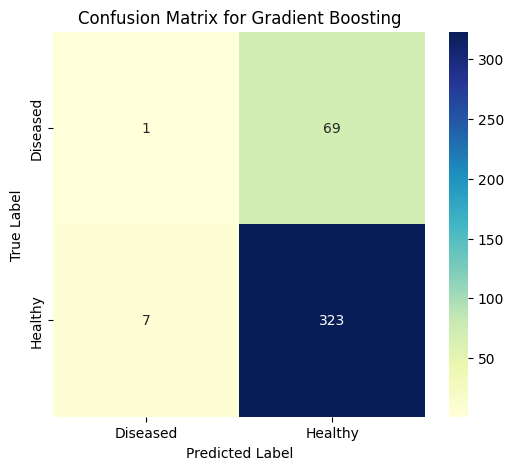

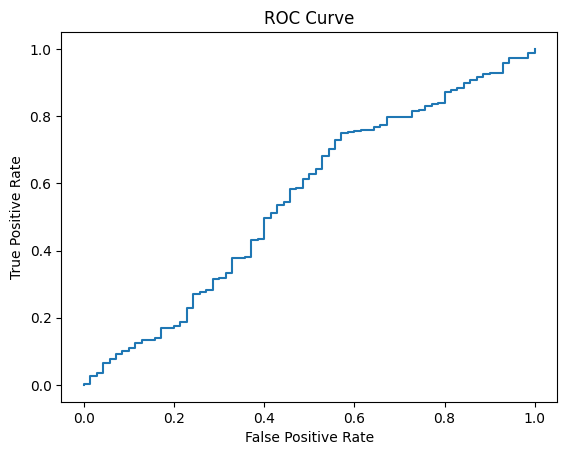

              precision    recall  f1-score   support

    Diseased       0.12      0.01      0.03        70
     Healthy       0.82      0.98      0.89       330

    accuracy                           0.81       400
   macro avg       0.47      0.50      0.46       400
weighted avg       0.70      0.81      0.74       400



In [44]:
# Initialize lists to store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    from sklearn.metrics import log_loss

    log_loss_value = log_loss(y_test, y_pred)
    
    # Calculate AUC
    if hasattr(model, "predict_proba"):  
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = None

    # Store results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "AUC": auc,
        "LOSS": log_loss_value,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, target_names=['Diseased', 'Healthy'])
    })

# Display results for each model
for result in results:
    print(f"\nModel: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    if result["AUC"] is not None:
        print(f"AUC: {result['AUC']:.2f}")
    print(f"\nLog loss: {result['LOSS']:.2f}")
    
    # Confusion Matrix Visualization
    cm = result["Confusion Matrix"]
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Diseased', 'Healthy'], 
                yticklabels=['Diseased', 'Healthy'])
    plt.title(f'Confusion Matrix for {result["Model"]}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Calcul et tracé de la courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    # Print Classification Report
    print(result["Classification Report"])

In [41]:
# Prepare a summary table for model evaluation
evaluation_summary = []

# Extract the key metrics for each model
for result in results:
    evaluation_summary.append({
        "Model": result["Model"],
        "Accuracy": result["Accuracy"],
        "AUC": result["AUC"]
    })

evaluation_summary_df = pd.DataFrame(evaluation_summary)

# Sort by accuracy and display
display(evaluation_summary_df.sort_values(by="Accuracy", ascending=False))

,Model,Accuracy,AUC
3,Random Forest,0.8250,0.503225
4,Gradient Boosting,0.8100,0.552294
1,KNN Classifier,0.8100,0.505411
2,Decision Tree,0.6950,0.488745
0,Logistic Regression,0.5575,0.545108


In [42]:
# Select the Model with the Highest AUC
best_model_name = max(results, key=lambda x: x["AUC"] if x["AUC"] is not None else -1)["Model"]
best_model = models[best_model_name]
print(f"The best model based on AUC is: {best_model_name}")

The best model based on AUC is: Gradient Boosting


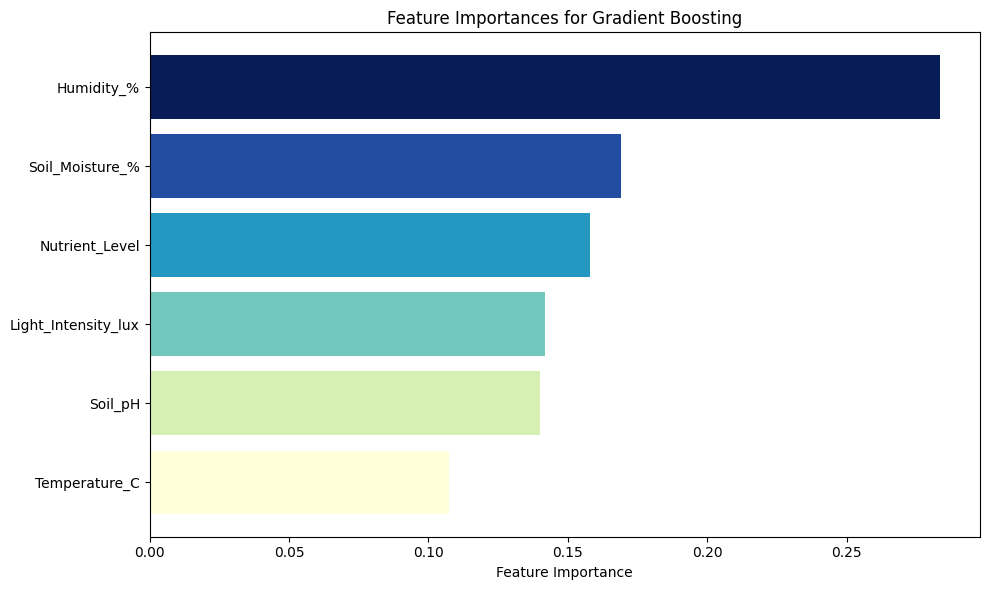

In [43]:
# Plot the Feature Importances
if hasattr(best_model, "feature_importances_"):  # Check if the model has feature_importances_
    feature_importances = best_model.feature_importances_
    feature_names = X.columns

    plt.figure(figsize=(10, 6))
    sorted_idx = feature_importances.argsort()[::-1]

    # Using color palette 'winter' for the bars
    colors = plt.cm.YlGnBu_r(np.linspace(0, 1, len(feature_importances)))

    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color=colors)
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importances for {best_model_name}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"{best_model_name} does not support feature importances.")